# Aplicando EDA

In [1]:
import numpy as np
import pandas as pd

# Preprocesamiento
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from joblib import Memory

# Modelado
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

# Evaluación y optimización
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from scipy.stats import randint, chi2_contingency, uniform

# Visualización
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Cargando dataset

adult = pd.read_csv('adult.csv')

# Visualizar el dataset

adult

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [3]:
# Determinar el número de filas y columnas

adult.shape

(32561, 15)

In [4]:
# Sustituir ? por NaN

adult.replace('?', np.nan, inplace=True)

# Validar el dataset

adult

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [5]:
# Validar el tipo de datos y valores nulos

adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# Validar el número de valores nulos por columna

adult.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [7]:
# Imputando valores nulos con su moda

adult['workclass'] = adult['workclass'].fillna(adult['workclass'].mode()[0])
adult['occupation'] = adult['occupation'].fillna(adult['occupation'].mode()[0])
adult['native.country'] = adult['native.country'].fillna(adult['native.country'].mode()[0])

In [8]:
# Generando estadisticas descriptivas

adult.describe(include='all')

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,24532,NaN,10501,NaN,14976,5983,13193,27816,21790,NaN,NaN,NaN,29753,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [9]:
# Validando datos duplicados

adult.duplicated().sum()

np.int64(24)

In [10]:
# Eliminando duplicados

adult.drop_duplicates(inplace=True)

In [11]:
# Validando valores únicos

adult.nunique()

age                  73
workclass             8
fnlwgt            21648
education            16
education.num        16
marital.status        7
occupation           14
relationship          6
race                  5
sex                   2
capital.gain        119
capital.loss         92
hours.per.week       94
native.country       41
income                2
dtype: int64

In [12]:
# Conviertiendo la variable objetivo a binaria

adult['income'] = adult['income'].map({'<=50K': 0, '>50K': 1})

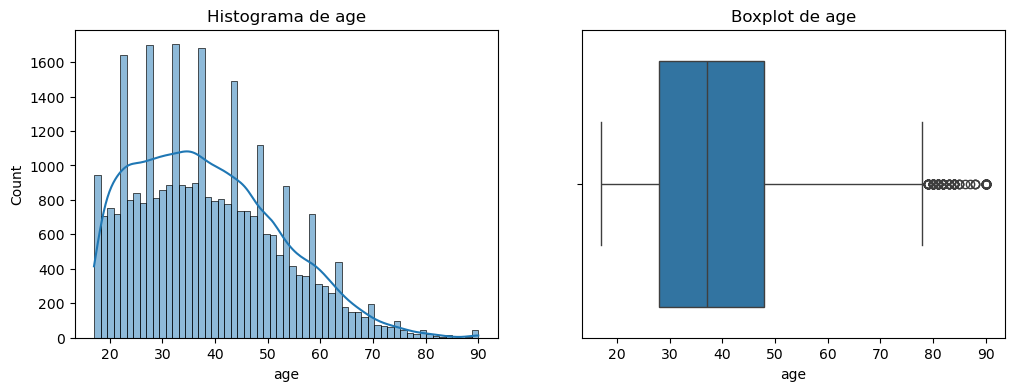

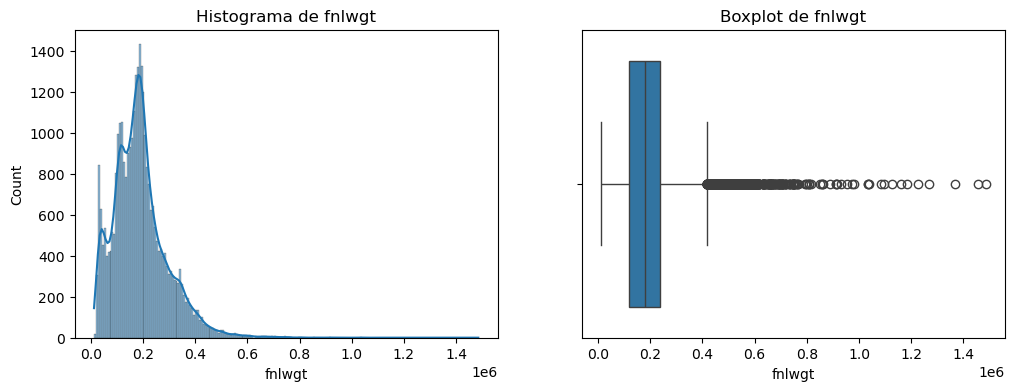

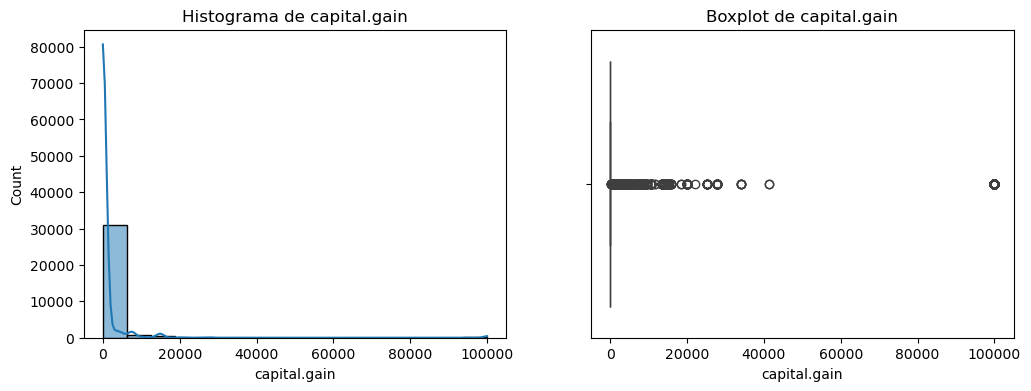

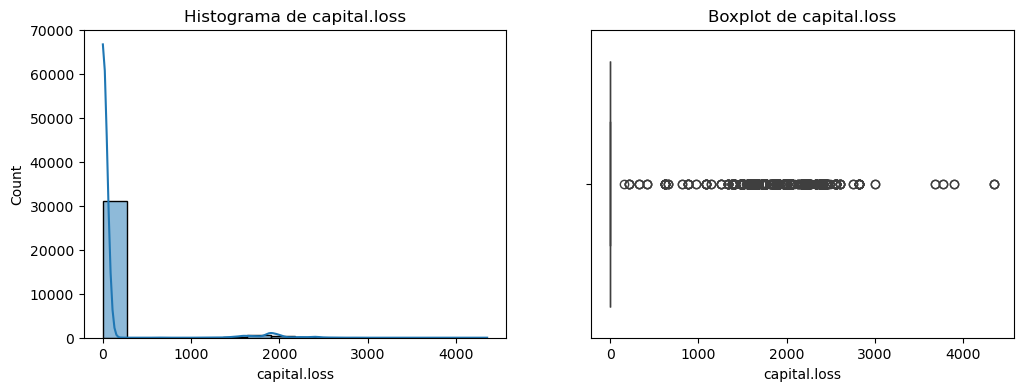

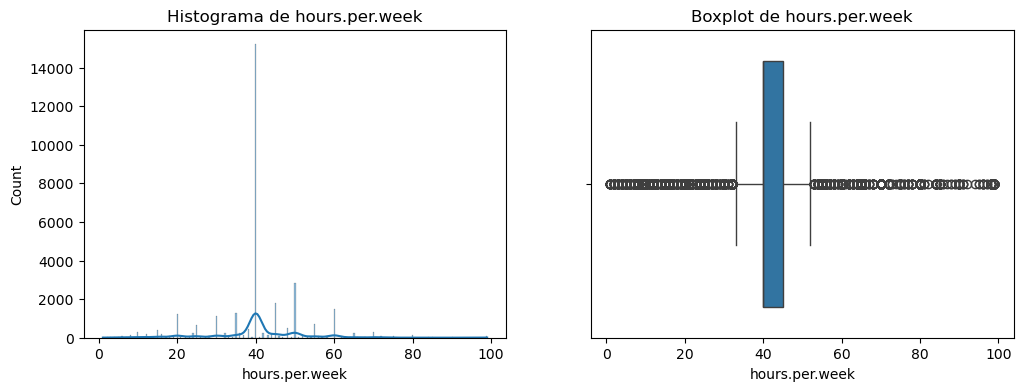

In [13]:
# Análisis de la distribución de las variables numéricas

numeric_cols = ["age", "fnlwgt", "capital.gain", "capital.loss", "hours.per.week"]
for col in numeric_cols:
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.histplot(adult[col], kde=True)
    plt.title(f'Histograma de {col}')
    
    plt.subplot(1,2,2)
    sns.boxplot(x=adult[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

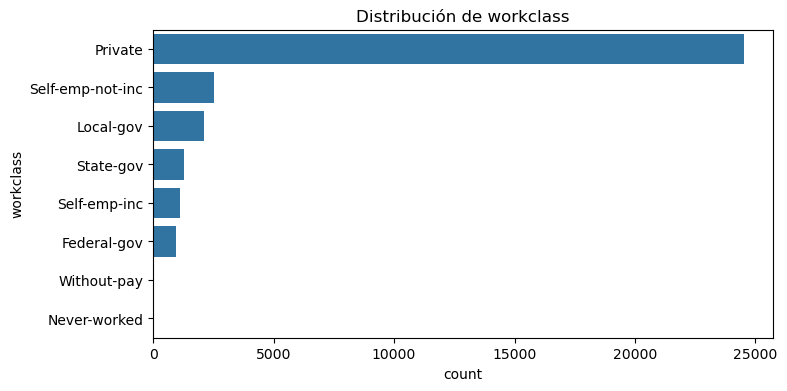

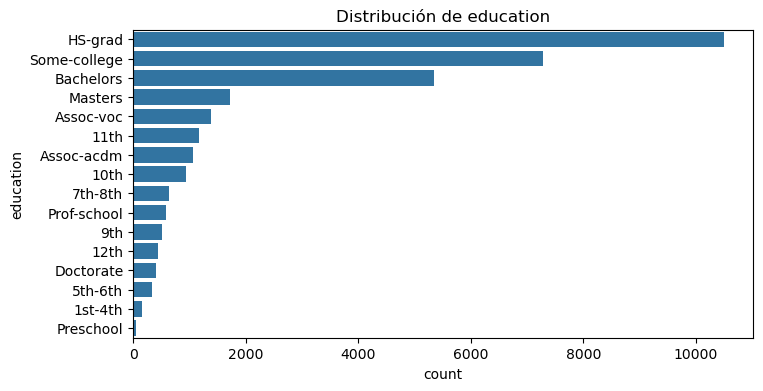

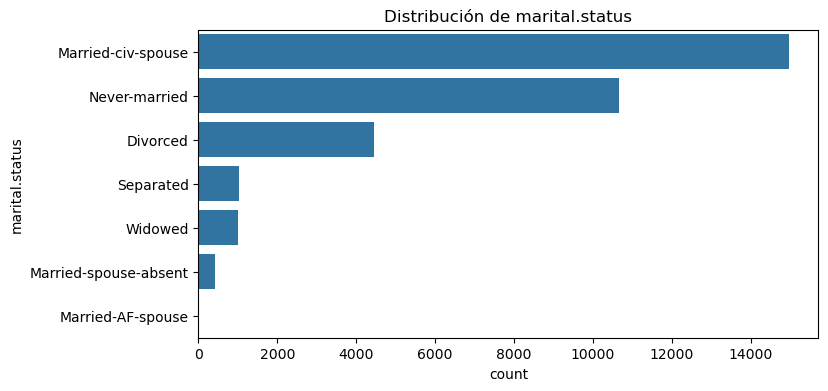

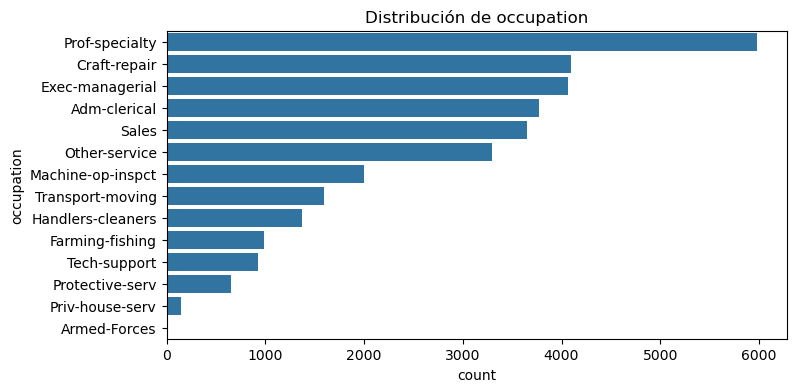

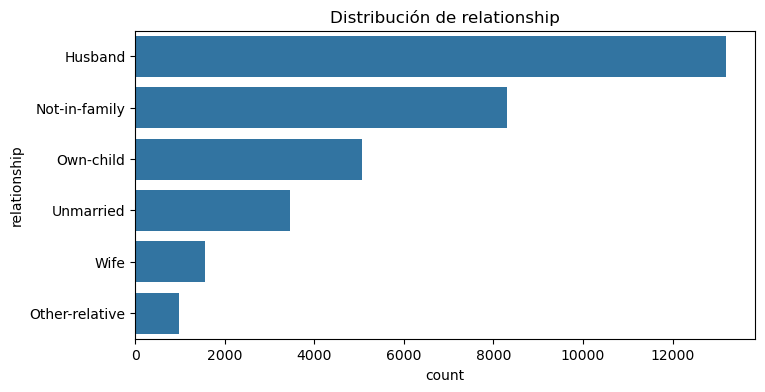

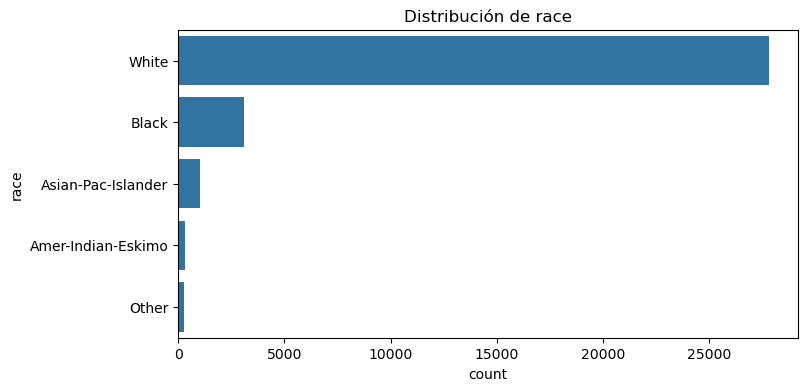

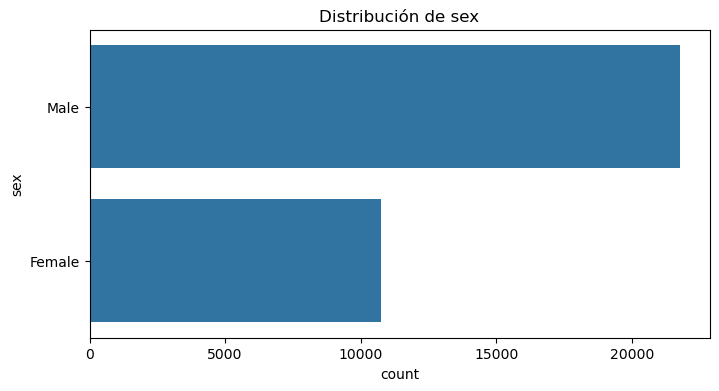

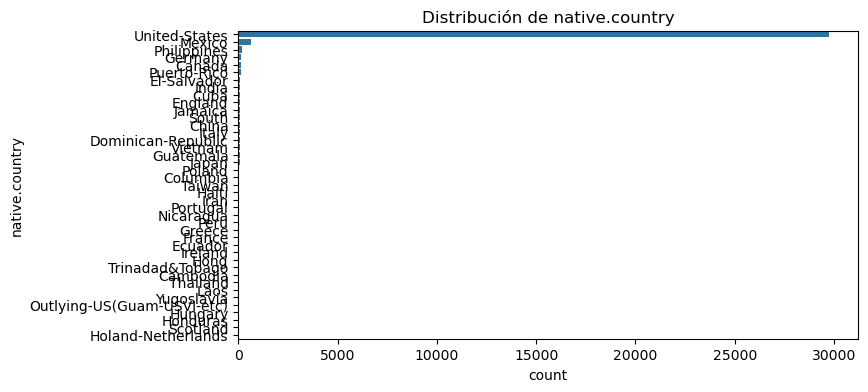

In [14]:
# Análisis de variables categóricas

categorical_cols = ["workclass", "education", "marital.status", "occupation", "relationship", "race", "sex", "native.country"]
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(y=adult[col], order=adult[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.show()

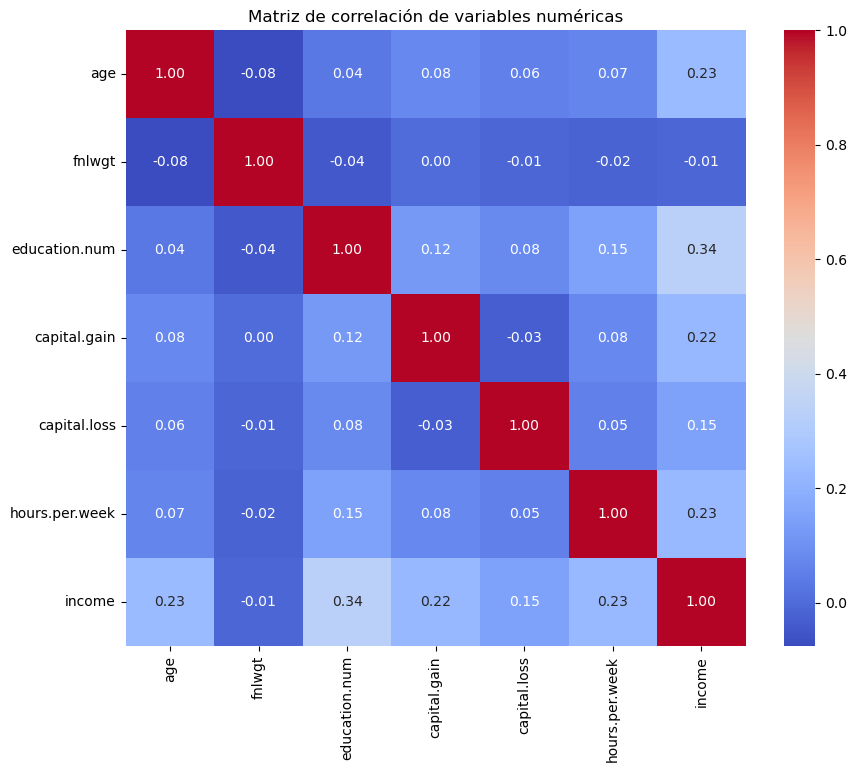

In [15]:
# Análisis de correlación

plt.figure(figsize=(10,8))
corr_matrix = adult.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación de variables numéricas")
plt.show()

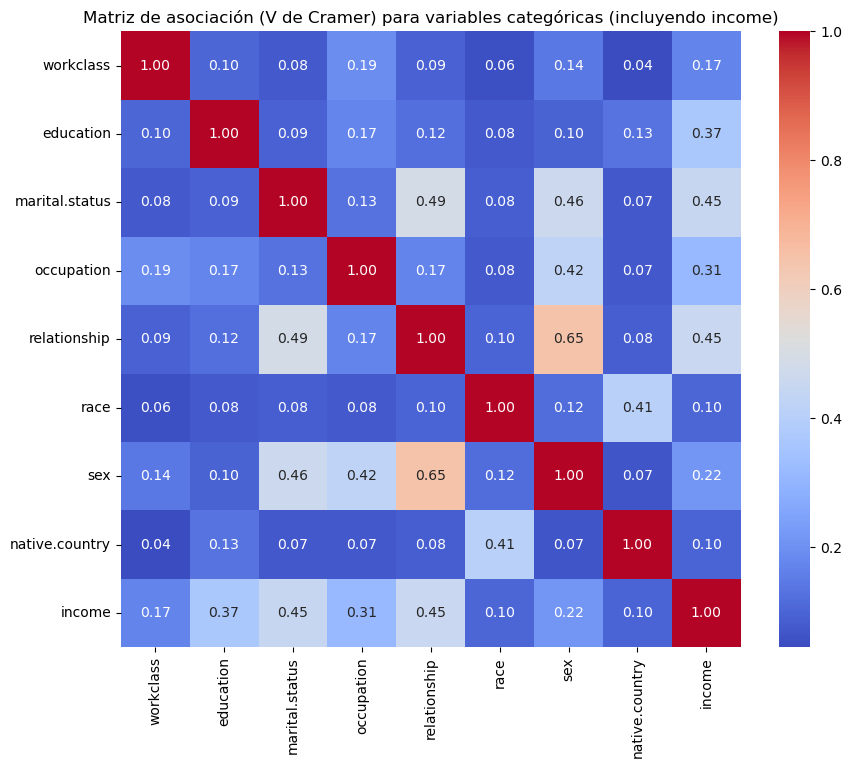

In [16]:
# Análisis de correlación entre variables categóricas

# Hacemos una copia temporal del dataframe para trabajar en formato categórico
adult_cat = adult.copy()

# Convertir temporalmente la variable 'income' a tipo string
adult_cat['income'] = adult_cat['income'].astype(str)

# Seleccionar todas las columnas categóricas (incluyendo 'income')
categorical_cols = adult_cat.select_dtypes(include='object').columns

# Función para calcular V de Cramer para dos variables categóricas
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2 = chi2_contingency(contingency_table)[0]
    n = contingency_table.to_numpy().sum()
    phi2 = chi2 / n
    r, k = contingency_table.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

# Crear una matriz vacía para almacenar V de Cramer
cat_corr = pd.DataFrame(np.zeros((len(categorical_cols), len(categorical_cols))),
                        index=categorical_cols, columns=categorical_cols)

# Calcular V de Cramer para cada par de variables categóricas
for col1 in categorical_cols:
    for col2 in categorical_cols:
        cat_corr.loc[col1, col2] = cramers_v(adult_cat[col1], adult_cat[col2])

# Visualizar la "matriz de correlación" para variables categóricas
plt.figure(figsize=(10,8))
sns.heatmap(cat_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de asociación (V de Cramer) para variables categóricas (incluyendo income)")
plt.show()

# Aplicando algoritmos de clasificación

In [17]:
# Separando variables predictoras y variable objetivo

y = adult['income']
x = adult.drop(columns=['income'])

In [18]:
# Dividir el dataset en entrenamiento y prueba

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
# Preprocesamiento pipeline

# Preprocesamiento pipeline

numeric_features = [
    "age",
    "fnlwgt",
    "education.num",
    "capital.gain",
    "capital.loss",
    "hours.per.week"
]

categorical_features = [
    "workclass",
    "education",
    "marital.status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native.country",
]


In [20]:
# Definir el preprocesador para las características numéricas y categóricas

numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

🔍 Evaluación baseline sin tuning

🔹 Logistic Regression
  ✔️ Train Accuracy:  0.8519
  ✔️ Test Accuracy:   0.8502
  📌 Precision:       0.7344
  📌 Recall:          0.5925
  📌 F1-score:        0.6558
  📈 ROC AUC:         0.9004

📋 Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      4940
           1       0.73      0.59      0.66      1568

    accuracy                           0.85      6508
   macro avg       0.81      0.76      0.78      6508
weighted avg       0.84      0.85      0.84      6508

🧩 Matriz de Confusión:


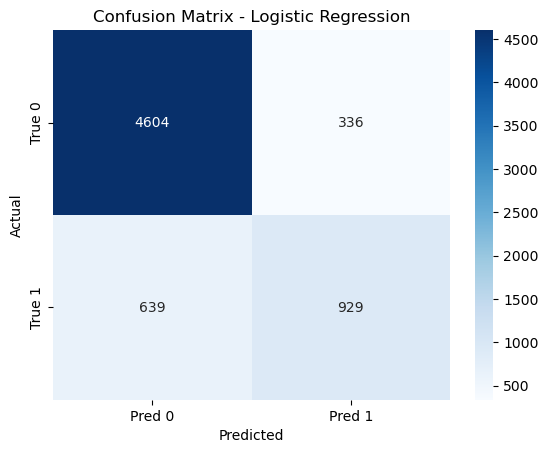

--------------------------------------------------

🔹 Decision Tree
  ✔️ Train Accuracy:  1.0000
  ✔️ Test Accuracy:   0.8133
  📌 Precision:       0.6108
  📌 Recall:          0.6205
  📌 F1-score:        0.6156
  📈 ROC AUC:         0.7475

📋 Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.87      0.88      4940
           1       0.61      0.62      0.62      1568

    accuracy                           0.81      6508
   macro avg       0.74      0.75      0.75      6508
weighted avg       0.81      0.81      0.81      6508

🧩 Matriz de Confusión:


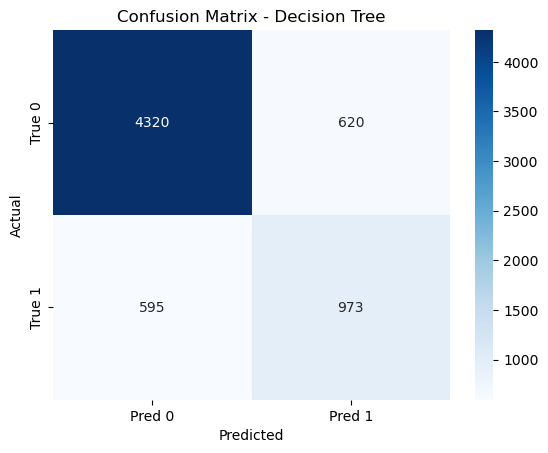

--------------------------------------------------

🔹 SVM
  ✔️ Train Accuracy:  0.8680
  ✔️ Test Accuracy:   0.8522
  📌 Precision:       0.7500
  📌 Recall:          0.5797
  📌 F1-score:        0.6540
  📈 ROC AUC:         0.8940

📋 Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4940
           1       0.75      0.58      0.65      1568

    accuracy                           0.85      6508
   macro avg       0.81      0.76      0.78      6508
weighted avg       0.85      0.85      0.85      6508

🧩 Matriz de Confusión:


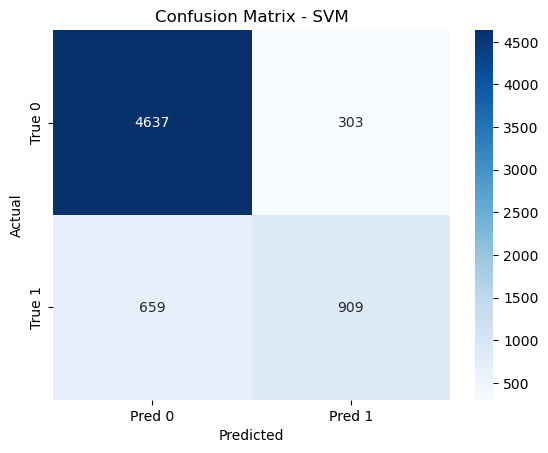

--------------------------------------------------

🔹 XGBoost


c:\ProgramData\miniconda3\envs\ml_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:35:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


  ✔️ Train Accuracy:  0.9048
  ✔️ Test Accuracy:   0.8666
  📌 Precision:       0.7676
  📌 Recall:          0.6403
  📌 F1-score:        0.6982
  📈 ROC AUC:         0.9205

📋 Classification Report:

              precision    recall  f1-score   support

           0       0.89      0.94      0.91      4940
           1       0.77      0.64      0.70      1568

    accuracy                           0.87      6508
   macro avg       0.83      0.79      0.81      6508
weighted avg       0.86      0.87      0.86      6508

🧩 Matriz de Confusión:


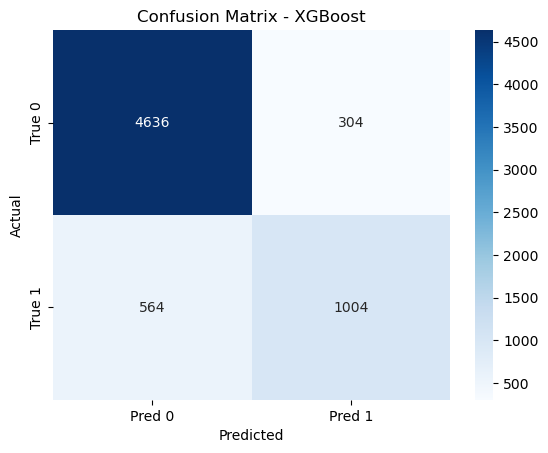

--------------------------------------------------

🔹 Gradient Boosting
  ✔️ Train Accuracy:  0.8709
  ✔️ Test Accuracy:   0.8591
  📌 Precision:       0.7724
  📌 Recall:          0.5886
  📌 F1-score:        0.6681
  📈 ROC AUC:         0.9138

📋 Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4940
           1       0.77      0.59      0.67      1568

    accuracy                           0.86      6508
   macro avg       0.83      0.77      0.79      6508
weighted avg       0.85      0.86      0.85      6508

🧩 Matriz de Confusión:


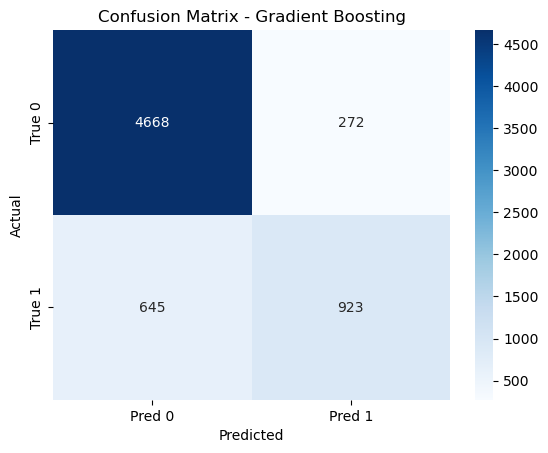

--------------------------------------------------



In [21]:
# Aplicando el preprocesador a los datos de entrenamiento y prueba

# Inicializar la lista para almacenar resultados
resultados_modelos = []

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(probability=True),
    "XGBoost": xgb.XGBClassifier(eval_metric='logloss', use_label_encoder=False),
    "Gradient Boosting": GradientBoostingClassifier()
}

print("🔍 Evaluación baseline sin tuning\n")

for name, clf in models.items():
    print(f"🔹 {name}")

    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("clf", clf)
    ])
    
    pipeline.fit(x_train, y_train)
    y_pred = pipeline.predict(x_test)
    
    train_acc = pipeline.score(x_train, y_train)
    test_acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
 
    # Almacenar resultado para la versión Base (sin tuning)
    resultados_modelos.append({"Modelo": f"{name} - Base", "F1": f1})

    # ROC AUC solo si es posible
    try:
        if hasattr(clf, "predict_proba"):
            y_proba = pipeline.predict_proba(x_test)[:, 1]
            roc_auc = roc_auc_score(y_test, y_proba)
        elif hasattr(clf, "decision_function"):
            y_score = pipeline.decision_function(x_test)
            roc_auc = roc_auc_score(y_test, y_score)
        else:
            roc_auc = None
    except:
        roc_auc = None

    print(f"  ✔️ Train Accuracy:  {train_acc:.4f}")
    print(f"  ✔️ Test Accuracy:   {test_acc:.4f}")
    print(f"  📌 Precision:       {precision:.4f}")
    print(f"  📌 Recall:          {recall:.4f}")
    print(f"  📌 F1-score:        {f1:.4f}")
    print(f"  📈 ROC AUC:         {roc_auc:.4f}" if roc_auc is not None else "  📈 ROC AUC:         N/A")
    
    print("\n📋 Classification Report:\n")
    print(classification_report(y_test, y_pred))
    
    # Mostrar matriz de confusión
    print("🧩 Matriz de Confusión:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Pred 0", "Pred 1"], yticklabels=["True 0", "True 1"])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    print("-" * 50 + "\n")


🔎 Conteo absoluto de clases:
income
0    24698
1     7839
Name: count, dtype: int64

📊 Proporción de clases (%):
income
0    75.91
1    24.09
Name: proportion, dtype: float64


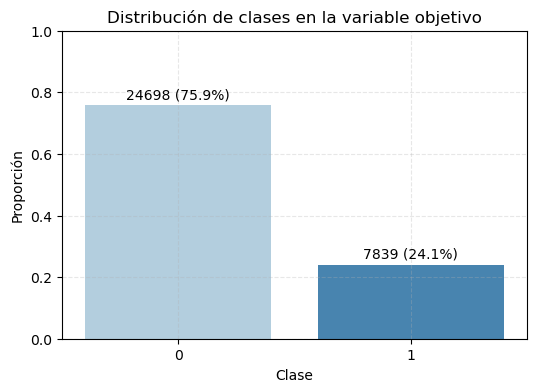

In [22]:
# Revisión de balanceo de clases

# Distribución de la variable objetivo
class_counts = y.value_counts(normalize=True)  # proporciones
absolute_counts = y.value_counts()             # totales

print("🔎 Conteo absoluto de clases:")
print(absolute_counts)
print("\n📊 Proporción de clases (%):")
print((class_counts * 100).round(2))

# Visualizar proporción con gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index.astype(str), y=class_counts.values, hue=class_counts.index.astype(str), palette='Blues', legend=False)
plt.title("Distribución de clases en la variable objetivo")
plt.xlabel("Clase")
plt.ylabel("Proporción")
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.3)
for i, val in enumerate(absolute_counts):
    plt.text(i, class_counts.values[i] + 0.02, f'{val} ({class_counts.values[i]*100:.1f}%)', ha='center')
plt.show()

In [23]:
# Definir los modelos a evaluar

model_configs = {
    "Logistic Regression": {
        "model": LogisticRegression(random_state=42),
        "param_grid": {
            "clf__penalty": ['l2'],
            "clf__C": [0.15, 0.2, 0.25, 0.3],
            "clf__solver": ['lbfgs'],
            "clf__class_weight": [
                {0: 1, 1: 1.5},
                {0: 1, 1: 1.75},
                {0: 1, 1: 2}
            ],
            "clf__max_iter": [1000],
            "clf__tol": [1e-4, 1e-5],
            "clf__fit_intercept": [True]
        }
    },

    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "param_grid": {
            "clf__criterion": ['entropy'],
            "clf__max_depth": [10, 12, 14],
            "clf__min_samples_leaf": [6, 8, 10],
            "clf__class_weight": [
                {0: 1, 1: 1.5},
                {0: 1, 1: 1.75},
                {0: 1, 1: 2}
            ],
            "clf__ccp_alpha": [0.0, 0.001]
        }
    },
    "XGBoost": {
        "model": xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
        "param_grid": {
            "clf__learning_rate": [0.05, 0.1],             
            "clf__n_estimators": [150, 200],                
            "clf__max_depth": [5, 6],                       
            "clf__gamma": [0.1],
            "clf__scale_pos_weight": [1.5],
            "clf__subsample": [0.8],
            "clf__colsample_bytree": [0.8]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "param_grid": {
            "clf__n_estimators": [200],
            "clf__learning_rate": [0.08, 0.1],
            "clf__max_depth": [3, 4],
            "clf__min_samples_split": [2, 3],
            "clf__subsample": [1.0]
    }
},
    "SVM": {
        "model": SVC(probability=True, random_state=42),
        "param_grid": {
            "clf__C": [0.8, 1, 1.2],
            "clf__gamma": ['scale', 0.1],
            "clf__class_weight": ['balanced']
        }
    }
}



🔍 Ajustando hiperparámetros para: Logistic Regression
Fitting 5 folds for each of 24 candidates, totalling 120 fits
✔️ Mejor combinación de hiperparámetros: {'clf__C': 0.3, 'clf__class_weight': {0: 1, 1: 1.75}, 'clf__fit_intercept': True, 'clf__max_iter': 1000, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs', 'clf__tol': 1e-05}
🔧 Umbral óptimo basado en F1: 0.44
--------------------------------------------------

🔹 Logistic Regression
  ✔️ Train Accuracy:  0.8451
  ✔️ Test Accuracy:   0.8305
  📌 Precision:       0.6186
  📌 Recall:          0.7736
  📌 F1-score:        0.6874
  📈 ROC AUC:         0.9007
  🎯 Threshold usado:  0.44

📋 Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      4940
           1       0.62      0.77      0.69      1568

    accuracy                           0.83      6508
   macro avg       0.77      0.81      0.79      6508
weighted avg       0.85      0.83      0.84      6508

🧩 Matriz de 

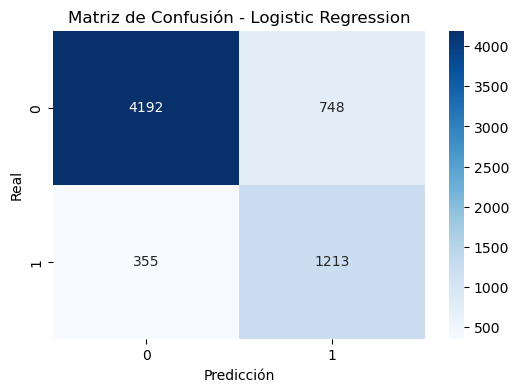

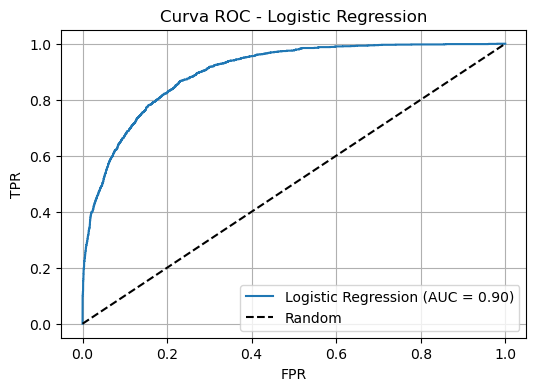

--------------------------------------------------


🔍 Ajustando hiperparámetros para: Decision Tree
Fitting 5 folds for each of 54 candidates, totalling 270 fits
✔️ Mejor combinación de hiperparámetros: {'clf__ccp_alpha': 0.0, 'clf__class_weight': {0: 1, 1: 1.75}, 'clf__criterion': 'entropy', 'clf__max_depth': 12, 'clf__min_samples_leaf': 8}
🔧 Umbral óptimo basado en F1: 0.52
--------------------------------------------------

🔹 Decision Tree
  ✔️ Train Accuracy:  0.8644
  ✔️ Test Accuracy:   0.8451
  📌 Precision:       0.6731
  📌 Recall:          0.6945
  📌 F1-score:        0.6836
  📈 ROC AUC:         0.8852
  🎯 Threshold usado:  0.52

📋 Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.89      0.90      4940
           1       0.67      0.69      0.68      1568

    accuracy                           0.85      6508
   macro avg       0.79      0.79      0.79      6508
weighted avg       0.85      0.85      0.85      6508

🧩

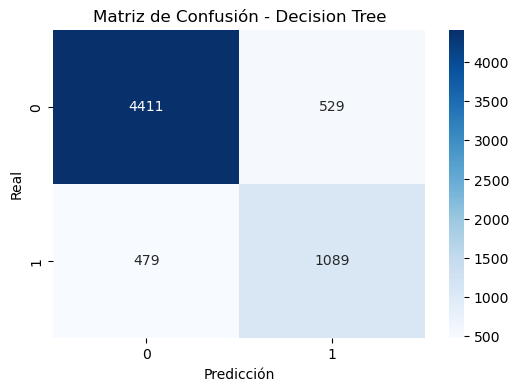

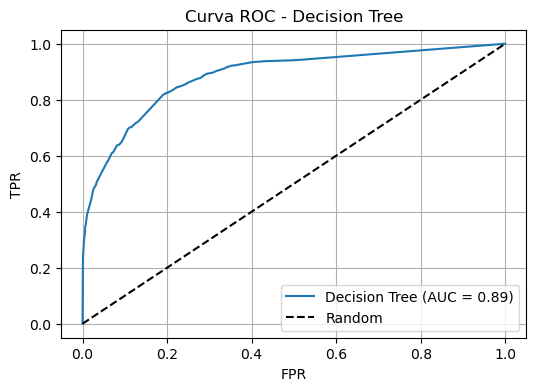

--------------------------------------------------


🔍 Ajustando hiperparámetros para: XGBoost
Fitting 5 folds for each of 8 candidates, totalling 40 fits


c:\ProgramData\miniconda3\envs\ml_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:36:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✔️ Mejor combinación de hiperparámetros: {'clf__colsample_bytree': 0.8, 'clf__gamma': 0.1, 'clf__learning_rate': 0.05, 'clf__max_depth': 6, 'clf__n_estimators': 200, 'clf__scale_pos_weight': 1.5, 'clf__subsample': 0.8}
🔧 Umbral óptimo basado en F1: 0.49
--------------------------------------------------

🔹 XGBoost
  ✔️ Train Accuracy:  0.8851
  ✔️ Test Accuracy:   0.8645
  📌 Precision:       0.7130
  📌 Recall:          0.7321
  📌 F1-score:        0.7225
  📈 ROC AUC:         0.9216
  🎯 Threshold usado:  0.49

📋 Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      4940
           1       0.71      0.73      0.72      1568

    accuracy                           0.86      6508
   macro avg       0.81      0.82      0.82      6508
weighted avg       0.87      0.86      0.87      6508

🧩 Matriz de Confusión:


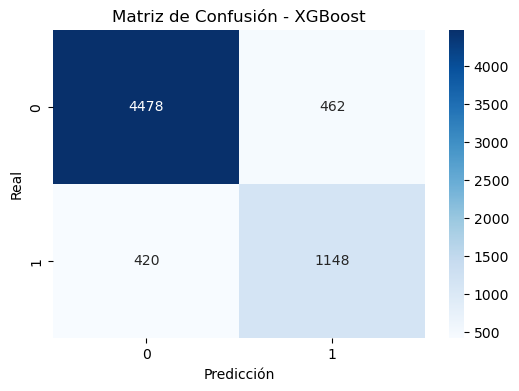

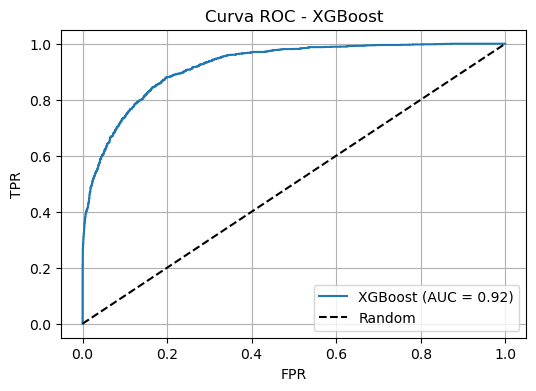

--------------------------------------------------


🔍 Ajustando hiperparámetros para: Gradient Boosting
Fitting 5 folds for each of 8 candidates, totalling 40 fits
✔️ Mejor combinación de hiperparámetros: {'clf__learning_rate': 0.1, 'clf__max_depth': 4, 'clf__min_samples_split': 3, 'clf__n_estimators': 200, 'clf__subsample': 1.0}
🔧 Umbral óptimo basado en F1: 0.37
--------------------------------------------------

🔹 Gradient Boosting
  ✔️ Train Accuracy:  0.8871
  ✔️ Test Accuracy:   0.8639
  📌 Precision:       0.7062
  📌 Recall:          0.7449
  📌 F1-score:        0.7250
  📈 ROC AUC:         0.9205
  🎯 Threshold usado:  0.37

📋 Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      4940
           1       0.71      0.74      0.73      1568

    accuracy                           0.86      6508
   macro avg       0.81      0.82      0.82      6508
weighted avg       0.87      0.86      0.87      6508

🧩 Matriz 

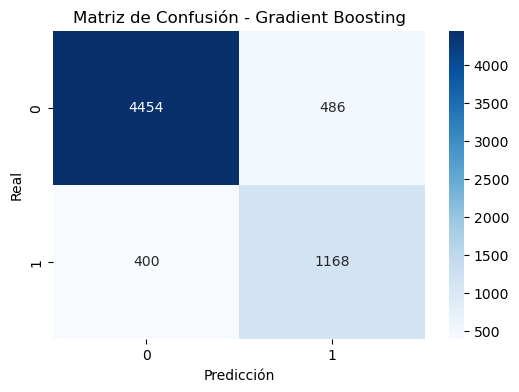

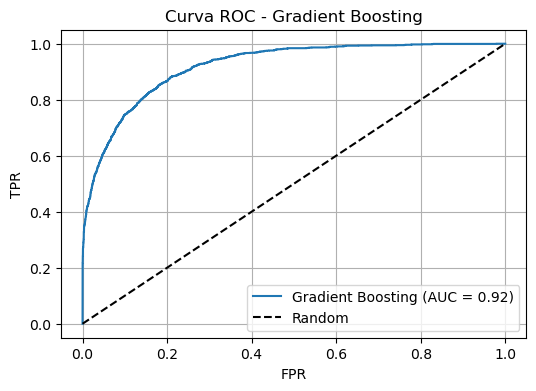

--------------------------------------------------


🔍 Ajustando hiperparámetros para: SVM
Fitting 5 folds for each of 6 candidates, totalling 30 fits
✔️ Mejor combinación de hiperparámetros: {'clf__C': 1.2, 'clf__class_weight': 'balanced', 'clf__gamma': 0.1}
🔧 Umbral óptimo basado en F1: 0.40
--------------------------------------------------

🔹 SVM
  ✔️ Train Accuracy:  0.8303
  ✔️ Test Accuracy:   0.8330
  📌 Precision:       0.6247
  📌 Recall:          0.7685
  📌 F1-score:        0.6892
  📈 ROC AUC:         0.8955
  🎯 Threshold usado:  0.40

📋 Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.85      0.89      4940
           1       0.62      0.77      0.69      1568

    accuracy                           0.83      6508
   macro avg       0.77      0.81      0.79      6508
weighted avg       0.85      0.83      0.84      6508

🧩 Matriz de Confusión:


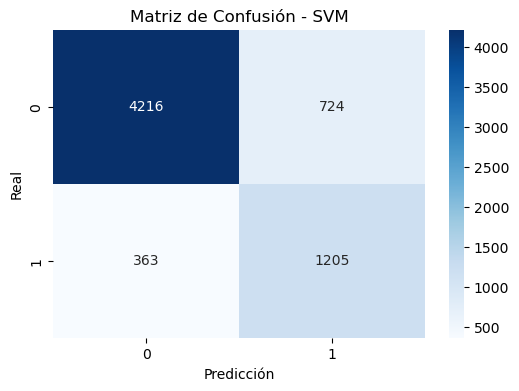

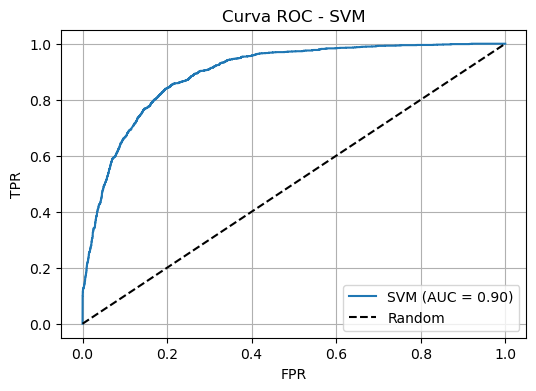

--------------------------------------------------



In [24]:
# Aplicar GridSearchCV para cada modelo

# Inicializar la lista para almacenar resultados
resultados_modelos = []

# Configuración del caché para acelerar el pipeline.
memory = Memory(location="./cachedir", verbose=0)

# Iterar sobre cada modelo configurado
for model_name, config in model_configs.items():
    print(f"\n🔍 Ajustando hiperparámetros para: {model_name}")

    # Crear el pipeline con caché para evitar recomputaciones en el preprocesador
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("clf", config["model"])
    ], memory=memory)

    # GridSearchCV: aprovechamos n_jobs=-1 para paralelización
    grid_search = GridSearchCV(
        pipeline,
        config["param_grid"],
        cv=5,
        scoring='f1',
        n_jobs=-1,
        verbose=2
    )
    grid_search.fit(x_train, y_train)

    # Mejor modelo y sus hiperparámetros
    best_model = grid_search.best_estimator_
    print("✔️ Mejor combinación de hiperparámetros:", grid_search.best_params_)

    # Obtener probabilidades o scores dependiendo del método implementado
    if hasattr(best_model, "predict_proba"):
        y_prob = best_model.predict_proba(x_test)[:, 1]
    elif hasattr(best_model, "decision_function"):
        y_prob = best_model.decision_function(x_test)
    else:
        y_prob = None

    # Optimizar el threshold directamente para maximizar el F1-score
    if y_prob is not None:
        precision_vals, recall_vals, pr_thresholds = precision_recall_curve(y_test, y_prob)
        f1_scores = 2 * (precision_vals[:-1] * recall_vals[:-1]) / (precision_vals[:-1] + recall_vals[:-1] + 1e-8)
        best_idx = np.argmax(f1_scores)
        optimal_threshold = pr_thresholds[best_idx]
        print(f"🔧 Umbral óptimo basado en F1: {optimal_threshold:.2f}")
        y_pred = (y_prob >= optimal_threshold).astype(int)
    else:
        y_pred = best_model.predict(x_test)
        optimal_threshold = None

    # Cálculo de métricas
    train_acc = best_model.score(x_train, y_train)
    test_acc = accuracy_score(y_test, y_pred)
    precision_metric = precision_score(y_test, y_pred)
    recall_metric = recall_score(y_test, y_pred)
    f1_metric = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None
    
    # Almacenar los resultados para este modelo (versión Grid)
    resultados_modelos.append({"Modelo": f"{model_name} - Grid", "F1": f1_metric})

    # ------------------------------ SALIDA ------------------------------
    print("--------------------------------------------------\n")
    print(f"🔹 {model_name}")
    print(f"  ✔️ Train Accuracy:  {train_acc:.4f}")
    print(f"  ✔️ Test Accuracy:   {test_acc:.4f}")
    print(f"  📌 Precision:       {precision_metric:.4f}")
    print(f"  📌 Recall:          {recall_metric:.4f}")
    print(f"  📌 F1-score:        {f1_metric:.4f}")
    if roc_auc is not None:
        print(f"  📈 ROC AUC:         {roc_auc:.4f}")
    if optimal_threshold is not None:
        print(f"  🎯 Threshold usado:  {optimal_threshold:.2f}")

    print("\n📋 Classification Report:\n")
    print(classification_report(y_test, y_pred))

    print("🧩 Matriz de Confusión:")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusión - {model_name}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

    # Opcional: Curva ROC para evaluación visual
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], "k--", label="Random")
        plt.xlabel("FPR")
        plt.ylabel("TPR")
        plt.title(f"Curva ROC - {model_name}")
        plt.legend()
        plt.grid(True)
        plt.show()

    print("--------------------------------------------------\n")


In [25]:
# Diccionario de modelos con parámetros para RandomizedSearchCV

model_random_configs = {
    "Logistic Regression": {
        "model": LogisticRegression(random_state=42),
        "param_dist": {
            "clf__penalty": ['l2'],
            "clf__C": uniform(0.01, 1.0),
            "clf__solver": ['lbfgs', 'saga'],
            "clf__class_weight": [
                {0: 1, 1: w} for w in uniform(1.2, 1.2).rvs(10)
            ],
            "clf__max_iter": [1000, 1500],
            "clf__tol": [1e-4, 1e-5, 1e-6],
            "clf__fit_intercept": [True, False]
        }
    },

    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "param_dist": {
            "clf__criterion": ['gini', 'entropy', 'log_loss'],
            "clf__max_depth": randint(5, 20),
            "clf__min_samples_leaf": randint(2, 15),
            "clf__min_samples_split": randint(2, 10),
            "clf__class_weight": [
                {0: 1, 1: w} for w in uniform(1.2, 1.5).rvs(10)
            ],
            "clf__ccp_alpha": uniform(0.0, 0.01)
        }
    },

    "XGBoost": {
        "model": xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
        "param_dist": {
            "clf__learning_rate": uniform(0.01, 0.2),
            "clf__n_estimators": randint(100, 300),
            "clf__max_depth": randint(3, 10),
            "clf__gamma": uniform(0, 0.5),
            "clf__scale_pos_weight": uniform(1, 3),
            "clf__subsample": uniform(0.7, 0.3),
            "clf__colsample_bytree": uniform(0.7, 0.3)
        }
    },

    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "param_dist": {
            "clf__n_estimators": randint(100, 300),
            "clf__learning_rate": uniform(0.01, 0.2),
            "clf__max_depth": randint(2, 6),
            "clf__min_samples_split": randint(2, 10),
            "clf__min_samples_leaf": randint(1, 10),
            "clf__subsample": uniform(0.7, 0.3)
        }
    },

    "SVM": {
        "model": SVC(probability=True, random_state=42),
        "param_dist": {
            "clf__C": uniform(0.8, 0.6),
            "clf__gamma": [0.05, 0.1, 0.2],
            "clf__kernel": ['rbf'],
            "clf__class_weight": ['balanced']
        }
    }
}


🔍 Ajustando hiperparámetros para: Logistic Regression
Fitting 5 folds for each of 30 candidates, totalling 150 fits
✔️ Mejor combinación de hiperparámetros: {'clf__C': np.float64(0.7851328233611146), 'clf__class_weight': {0: 1, 1: np.float64(1.8073861774428621)}, 'clf__fit_intercept': False, 'clf__max_iter': 1500, 'clf__penalty': 'l2', 'clf__solver': 'saga', 'clf__tol': 1e-05}
🔧 Umbral óptimo basado en F1: 0.45
--------------------------------------------------

🔹 Logistic Regression
  ✔️ Train Accuracy:  0.8437
  ✔️ Test Accuracy:   0.8308
  📌 Precision:       0.6186
  📌 Recall:          0.7768
  📌 F1-score:        0.6887
  📈 ROC AUC:         0.9007
  🎯 Threshold usado:  0.45

📋 Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.85      0.88      4940
           1       0.62      0.78      0.69      1568

    accuracy                           0.83      6508
   macro avg       0.77      0.81      0.79      6508
weighted avg  

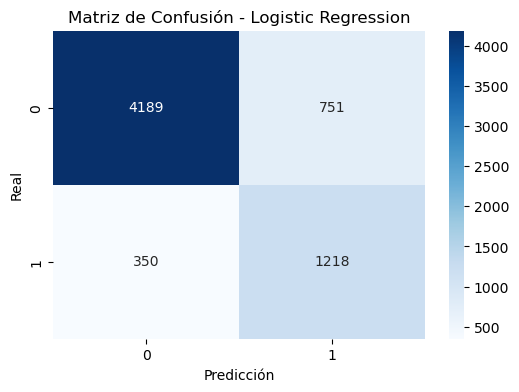

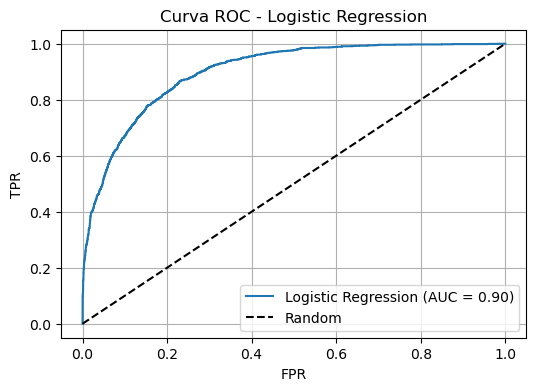

--------------------------------------------------


🔍 Ajustando hiperparámetros para: Decision Tree
Fitting 5 folds for each of 30 candidates, totalling 150 fits
✔️ Mejor combinación de hiperparámetros: {'clf__ccp_alpha': np.float64(0.00015636406741193932), 'clf__class_weight': {0: 1, 1: np.float64(1.745349962032184)}, 'clf__criterion': 'gini', 'clf__max_depth': 16, 'clf__min_samples_leaf': 9, 'clf__min_samples_split': 9}
🔧 Umbral óptimo basado en F1: 0.50
--------------------------------------------------

🔹 Decision Tree
  ✔️ Train Accuracy:  0.8576
  ✔️ Test Accuracy:   0.8431
  📌 Precision:       0.6512
  📌 Recall:          0.7513
  📌 F1-score:        0.6977
  📈 ROC AUC:         0.9004
  🎯 Threshold usado:  0.50

📋 Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      4940
           1       0.65      0.75      0.70      1568

    accuracy                           0.84      6508
   macro avg       0.78     

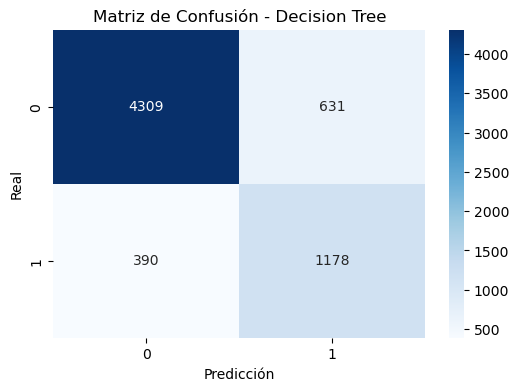

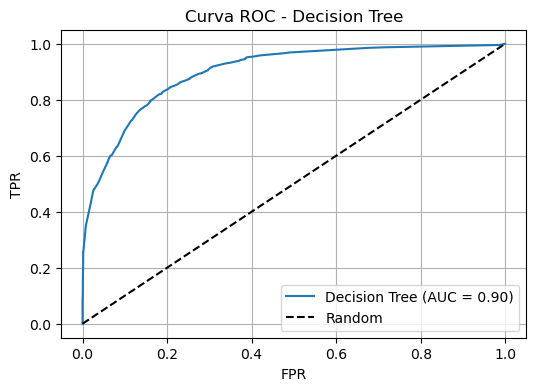

--------------------------------------------------


🔍 Ajustando hiperparámetros para: XGBoost
Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\ProgramData\miniconda3\envs\ml_env\Lib\site-packages\xgboost\training.py:183: UserWarning: [11:08:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✔️ Mejor combinación de hiperparámetros: {'clf__colsample_bytree': np.float64(0.9895765921792413), 'clf__gamma': np.float64(0.30351712384334234), 'clf__learning_rate': np.float64(0.06519983640450867), 'clf__max_depth': 7, 'clf__n_estimators': 114, 'clf__scale_pos_weight': np.float64(1.4958008171890076), 'clf__subsample': np.float64(0.7046909220223582)}
🔧 Umbral óptimo basado en F1: 0.48
--------------------------------------------------

🔹 XGBoost
  ✔️ Train Accuracy:  0.8862
  ✔️ Test Accuracy:   0.8642
  📌 Precision:       0.7106
  📌 Recall:          0.7360
  📌 F1-score:        0.7231
  📈 ROC AUC:         0.9210
  🎯 Threshold usado:  0.48

📋 Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      4940
           1       0.71      0.74      0.72      1568

    accuracy                           0.86      6508
   macro avg       0.81      0.82      0.82      6508
weighted avg       0.87      0.86      0.86      650

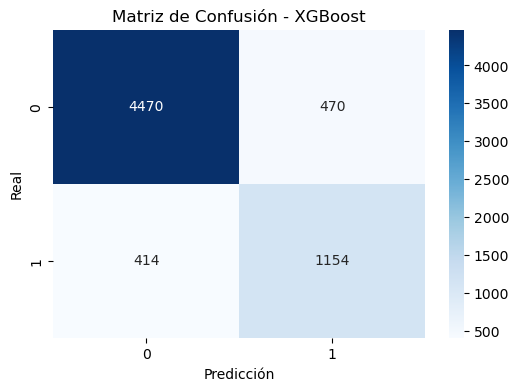

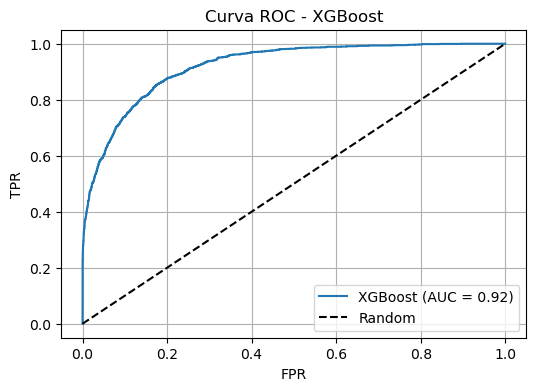

--------------------------------------------------


🔍 Ajustando hiperparámetros para: Gradient Boosting
Fitting 5 folds for each of 30 candidates, totalling 150 fits
✔️ Mejor combinación de hiperparámetros: {'clf__learning_rate': np.float64(0.05368808744336672), 'clf__max_depth': 5, 'clf__min_samples_leaf': 7, 'clf__min_samples_split': 5, 'clf__n_estimators': 289, 'clf__subsample': np.float64(0.733015577358303)}
🔧 Umbral óptimo basado en F1: 0.35
--------------------------------------------------

🔹 Gradient Boosting
  ✔️ Train Accuracy:  0.8937
  ✔️ Test Accuracy:   0.8579
  📌 Precision:       0.6847
  📌 Recall:          0.7602
  📌 F1-score:        0.7205
  📈 ROC AUC:         0.9206
  🎯 Threshold usado:  0.35

📋 Classification Report:

              precision    recall  f1-score   support

           0       0.92      0.89      0.90      4940
           1       0.68      0.76      0.72      1568

    accuracy                           0.86      6508
   macro avg       0.80      0.82 

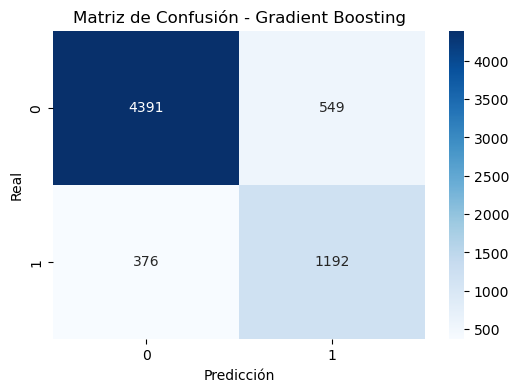

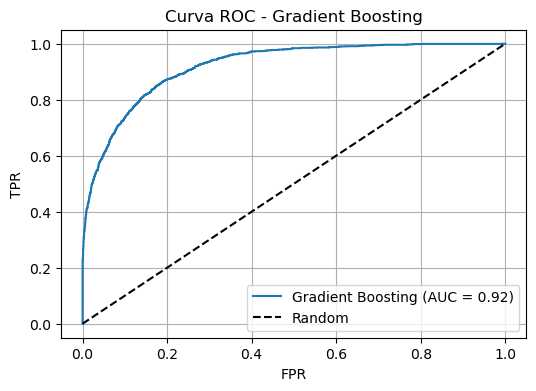

--------------------------------------------------


🔍 Ajustando hiperparámetros para: SVM
Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [ ]:
# Aplicar RandomizedSearchCV para cada modelo

# Inicializar la lista para almacenar resultados
resultados_modelos = []

# Configurar caché para acelerar el pipeline
memory = Memory(location="./cachedir", verbose=0)

# Iterar sobre cada modelo configurado
for model_name, config in model_random_configs.items():
    print(f"\n🔍 Ajustando hiperparámetros para: {model_name}")

    # Crear el pipeline con caché para evitar recomputaciones
    pipeline = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("clf", config["model"])
    ], memory=memory)

    # RandomizedSearchCV: búsqueda aleatoria de hiperparámetros
    random_search = RandomizedSearchCV(
        estimator=pipeline,
        param_distributions=config["param_dist"],
        n_iter=30,
        cv=5,
        scoring='f1',
        n_jobs=-1,
        verbose=2,
        random_state=42
    )
    random_search.fit(x_train, y_train)

    # Mejor modelo y sus hiperparámetros
    best_model = random_search.best_estimator_
    print("✔️ Mejor combinación de hiperparámetros:", random_search.best_params_)

    # Obtener probabilidades o scores según el método disponible
    if hasattr(best_model, "predict_proba"):
        y_prob = best_model.predict_proba(x_test)[:, 1]
    elif hasattr(best_model, "decision_function"):
        y_prob = best_model.decision_function(x_test)
    else:
        y_prob = None

    # Optimización del umbral
    if y_prob is not None:
        precision_vals, recall_vals, pr_thresholds = precision_recall_curve(y_test, y_prob)
        f1_scores = 2 * (precision_vals[:-1] * recall_vals[:-1]) / (precision_vals[:-1] + recall_vals[:-1] + 1e-8)
        best_idx = np.argmax(f1_scores)
        optimal_threshold = pr_thresholds[best_idx]
        print(f"🔧 Umbral óptimo basado en F1: {optimal_threshold:.2f}")
        y_pred = (y_prob >= optimal_threshold).astype(int)
    else:
        y_pred = best_model.predict(x_test)
        optimal_threshold = None

    # Métricas
    train_acc = best_model.score(x_train, y_train)
    test_acc = accuracy_score(y_test, y_pred)
    precision_metric = precision_score(y_test, y_pred)
    recall_metric = recall_score(y_test, y_pred)
    f1_metric = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    # Almacenar el resultado para la versión Random (RandomizedSearchCV)
    resultados_modelos.append({"Modelo": f"{model_name} - Random", "F1": f1_metric})

    # ------------------------------ SALIDA ------------------------------
    print("--------------------------------------------------\n")
    print(f"🔹 {model_name}")
    print(f"  ✔️ Train Accuracy:  {train_acc:.4f}")
    print(f"  ✔️ Test Accuracy:   {test_acc:.4f}")
    print(f"  📌 Precision:       {precision_metric:.4f}")
    print(f"  📌 Recall:          {recall_metric:.4f}")
    print(f"  📌 F1-score:        {f1_metric:.4f}")
    if roc_auc is not None:
        print(f"  📈 ROC AUC:         {roc_auc:.4f}")
    if optimal_threshold is not None:
        print(f"  🎯 Threshold usado:  {optimal_threshold:.2f}")

    print("\n📋 Classification Report:\n")
    print(classification_report(y_test, y_pred))

    print("🧩 Matriz de Confusión:")
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusión - {model_name}")
    plt.xlabel("Predicción")
    plt.ylabel("Real")
    plt.show()

    # Curva ROC opcional
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        plt.figure(figsize=(6, 4))
        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], "k--", label="Random")
        plt.xlabel("FPR")
        plt.ylabel("TPR")
        plt.title(f"Curva ROC - {model_name}")
        plt.legend()
        plt.grid(True)
        plt.show()

    print("--------------------------------------------------\n")

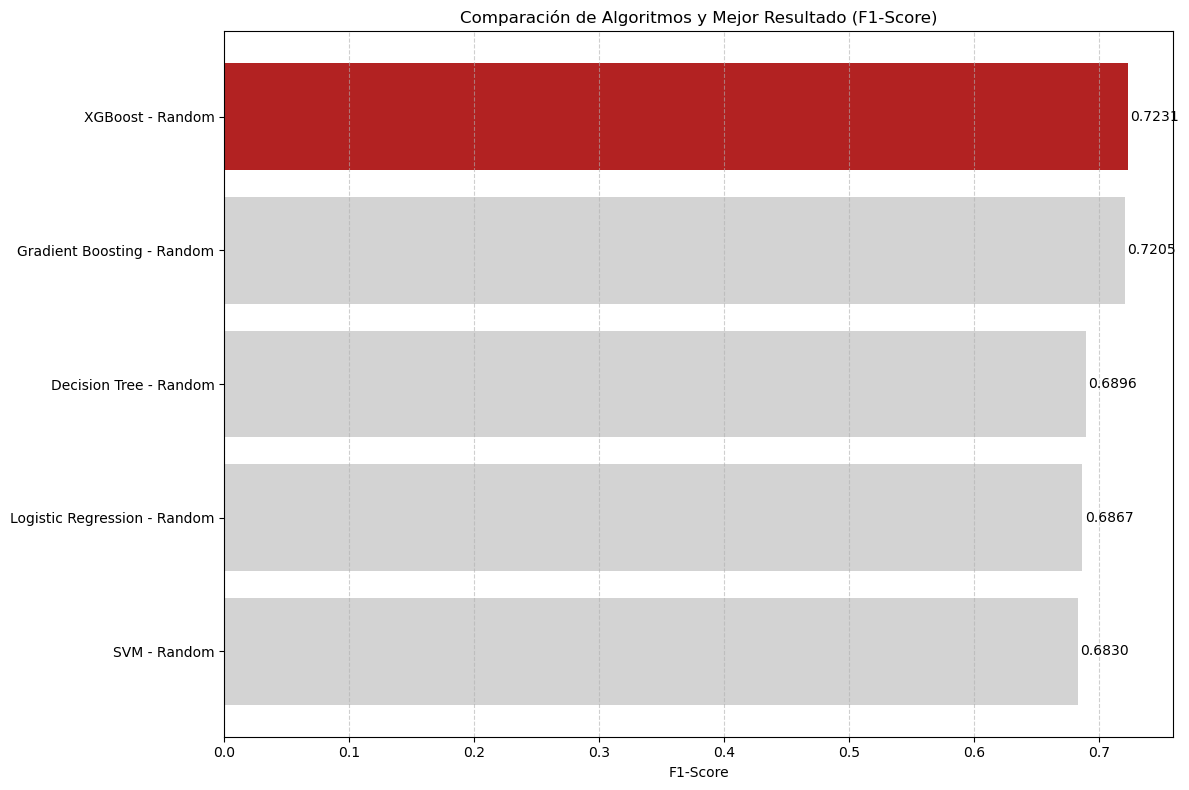

El algoritmo con el mejor resultado es: XGBoost - Random con un F1-Score de 0.7231


In [ ]:
# Visualización de resultados

# Convertir la lista en DataFrame
df_resultados = pd.DataFrame(resultados_modelos)

# Ordenar los resultados por F1-score (de menor a mayor)
df_resultados_sorted = df_resultados.sort_values(by="F1", ascending=True)

# Encontrar el algoritmo con el mejor F1-score
best_idx = df_resultados_sorted["F1"].idxmax()
best_model = df_resultados_sorted.loc[best_idx, "Modelo"]

# Crear una lista de colores para las barras:

colors = ["lightgray"] * len(df_resultados_sorted)
# Obtener la posición en el DataFrame ordenado del índice del mejor valor
best_index_in_sorted = df_resultados_sorted.index.get_loc(best_idx)
colors[best_index_in_sorted] = "firebrick"

# Graficar la comparación
plt.figure(figsize=(12, 8))
bars = plt.barh(df_resultados_sorted["Modelo"], df_resultados_sorted["F1"], color=colors)
plt.xlabel("F1-Score")
plt.title("Comparación de Algoritmos y Mejor Resultado (F1-Score)")
plt.grid(True, axis="x", linestyle="--", alpha=0.6)

# Agregar etiqueta de valor al final de cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.002, bar.get_y() + bar.get_height()/2,
             f"{width:.4f}", va="center")

plt.tight_layout()
plt.savefig("comparacion_algoritmos_f1score.png", dpi=300)
plt.show()

print(f"El algoritmo con el mejor resultado es: {best_model} con un F1-Score de {df_resultados_sorted['F1'].max():.4f}")